In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error

In [17]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

# Prepare features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])
y = df['age']

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949)

LOCO

In [8]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [9]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [ ]:
# define fit_func
def ridge2(X,Y,X1):
    clf = Ridge(fit_intercept = False,alpha=1000, max_iter= 1000).fit(X, Y)    
    return clf.predict(X1)

In [ ]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = ridge2

In [18]:
x=LOCOMPReg(X_train,y_train,n_ratio,m_ratio,B,fit_func, selected_features=[],alpha=0.1,bonf=False)
x.run_loco()

In [19]:
x.loco_ci

array([[ 3.13479961e-01,  6.26959923e-01, -8.02005559e-04,
         1.47471577e-03,  3.36355103e-04],
       [ 2.71739004e-01,  5.43478007e-01, -1.98290940e-03,
         4.30576709e-03,  1.16142884e-03],
       [ 7.41794067e-01,  5.16411865e-01, -1.45078764e-03,
         6.29948082e-04, -4.10419778e-04],
       ...,
       [ 3.92715806e-01,  7.85431613e-01, -1.88872724e-04,
         2.63796124e-04,  3.74616999e-05],
       [ 7.11396321e-01,  5.77207358e-01, -4.46069108e-04,
         2.20244301e-04, -1.12912404e-04],
       [ 5.88026600e-01,  8.23946800e-01, -6.19695899e-04,
         4.72035789e-04, -7.38300547e-05]], shape=(262, 5))

In [20]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

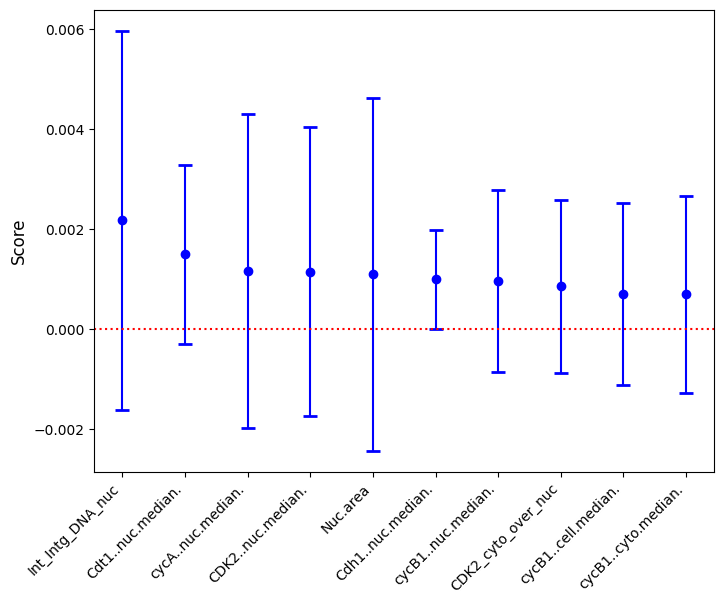

In [21]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()